# CSE602: Machine Learning - I

# PROJECT ML-1

### Submitted by:
#### Name    : Muhammad Amin Ghias - 25366

#### Name    : UZAIR ZAHIDI - 25374

Date : 8th May 2022

# Targetted Marketting

Large amount of moeny is spent by companies on advertisements. The result of this expenditure on advertisment is not efficient and is costly.

Companies are now trying to improve efficiency of advertisemnet and target proper customers

This project will help in reducing the cost of advertisemnet and will pinpoint which people must be targetted for advertisment and which people are not.



# Approach

##	Part-1
Step 1. We will break dataset into 2 on basis of treatment
1.	Dataset where customers have not been treated that is treatment = 0
2.	 Dataset where customers have been treated that is treatment =1

###	Model-1
Step 2. We will train dataset on treatment 0 and predict on dataset of treatment 1

Step 3. Break dataset of treatment 1 on basis of predicted values into 4 smaller datasets of each class for treatment 1 dataset the 4 classes:
Sure thing (Who will visit irrespective of treatment or not)
Don’t Disturb (Who will change from visiting to not visiting when treated with advertisement, that is negative effect of treatment)
Lost Cause (Who will not visit irrespective of treatment or not)
Persuadables (Who will visit when they are targeted)

###	Model-2
Step 4. Now train on treatment 1 dataset and predict on dataset of treatment 0

Step 5. Break dataset of treatment 0 on basis of predicted values into 4 smaller datasets of each class for treatment 0 

Step 6. Combine all the datasets with added class feature now our dataset has 4 classes


# Importing Libraries

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
import numpy as np  
import matplotlib.pyplot as plt
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from matplotlib import pyplot

from numpy import mean


import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
reg = LinearRegression()


# Importing CSV file & Dataset analysis

In [3]:
df = pd.read_csv('criteo-uplift-v2.1.csv')
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


In [11]:
df.shape

(13979592, 16)

In [12]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [14]:
df.dtypes

f0            float64
f1            float64
f2            float64
f3            float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
f9            float64
f10           float64
f11           float64
treatment       int64
conversion      int64
visit           int64
exposure        int64
dtype: object

In [15]:
df.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'treatment', 'conversion', 'visit', 'exposure'],
      dtype='object')

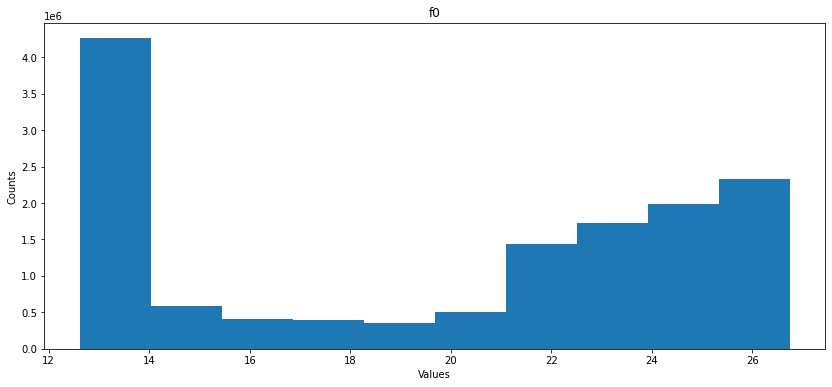

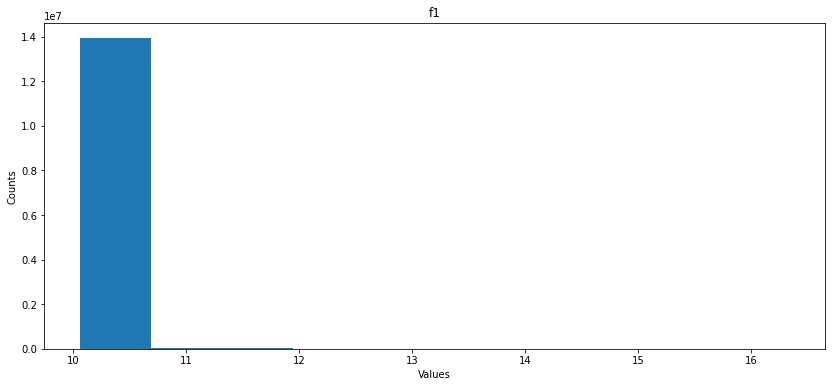

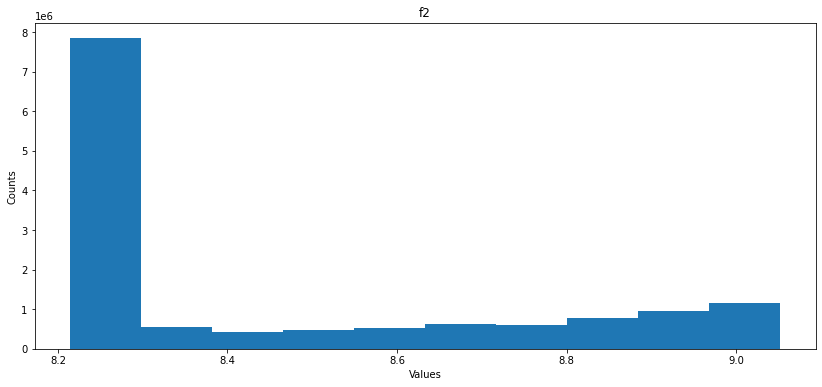

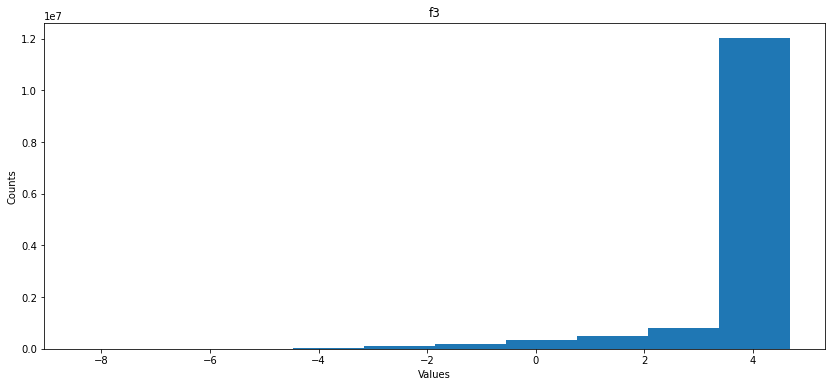

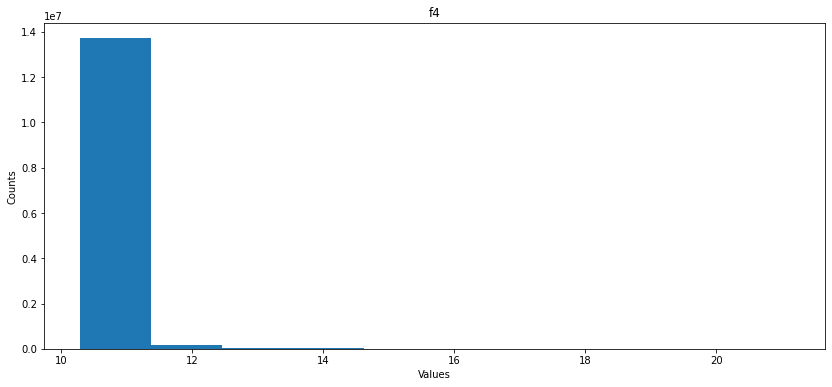

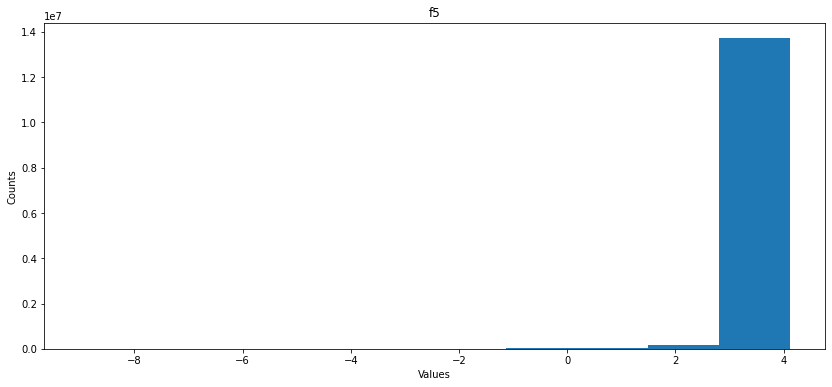

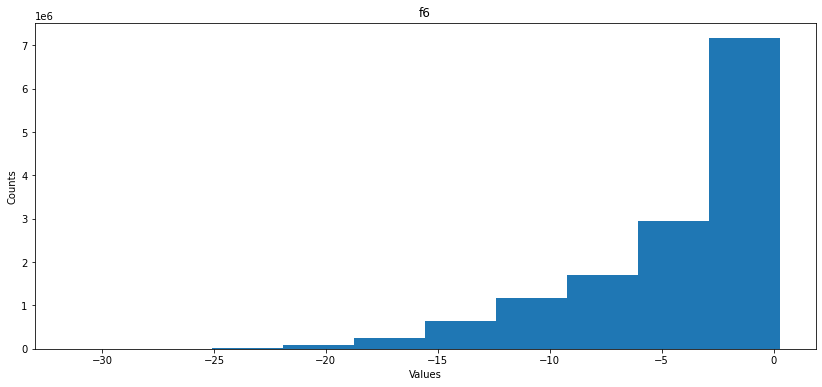

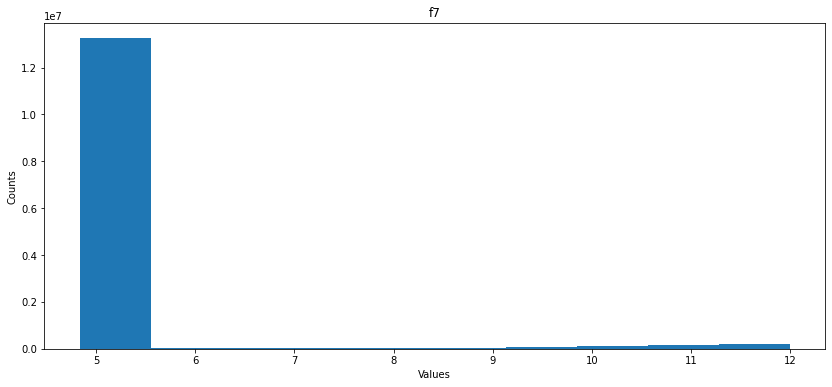

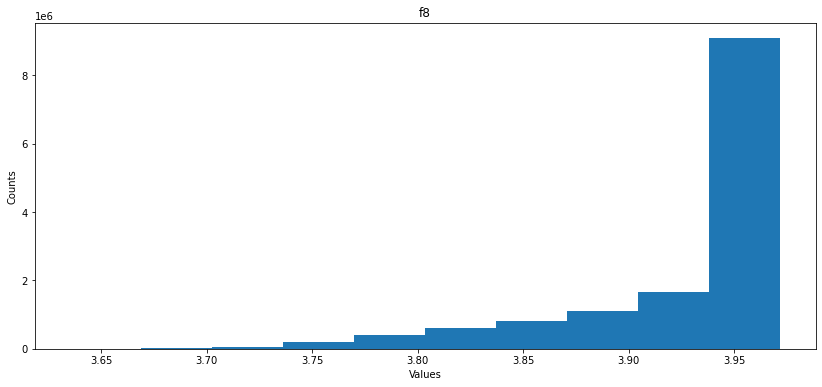

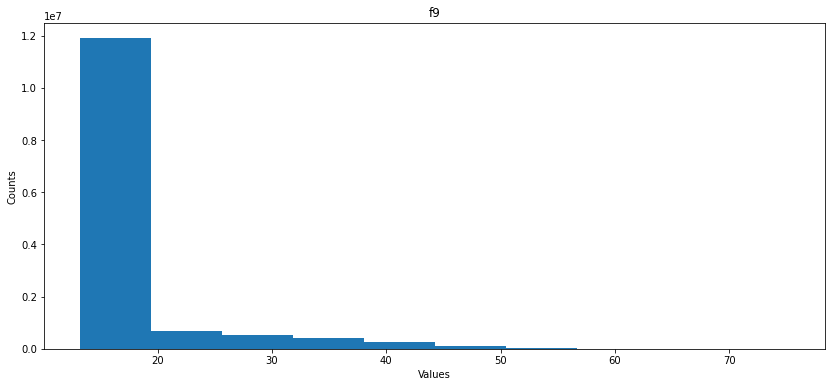

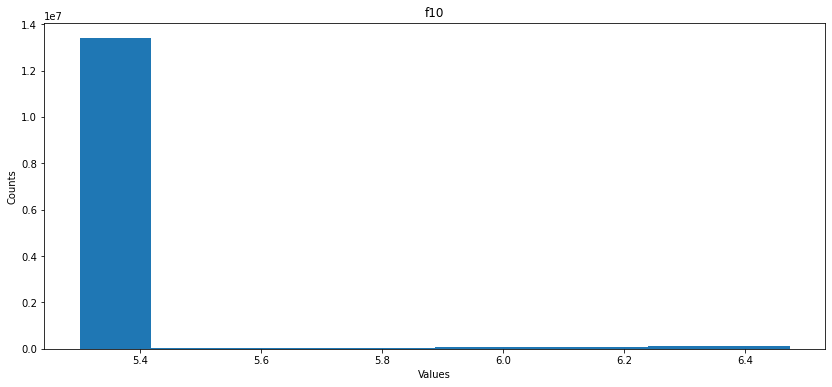

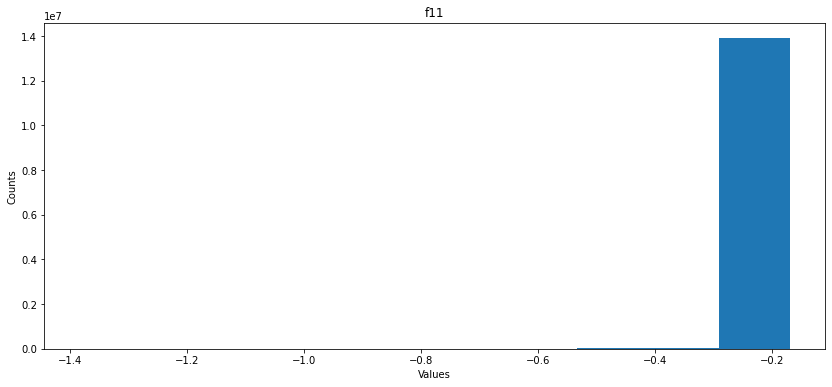

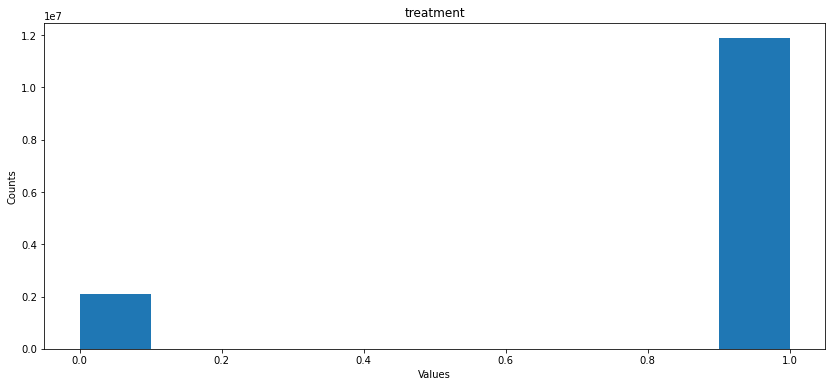

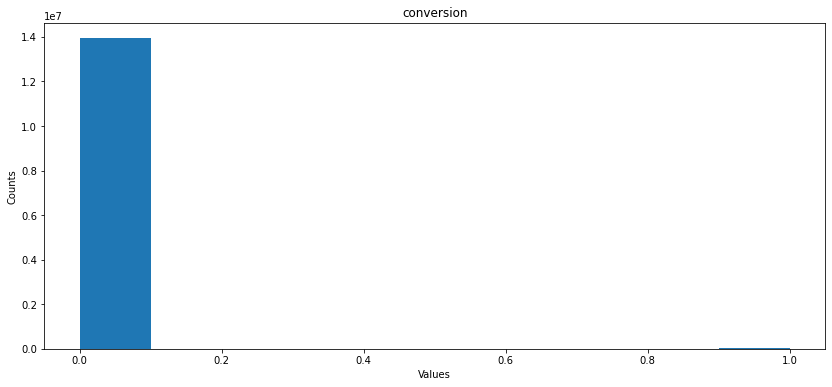

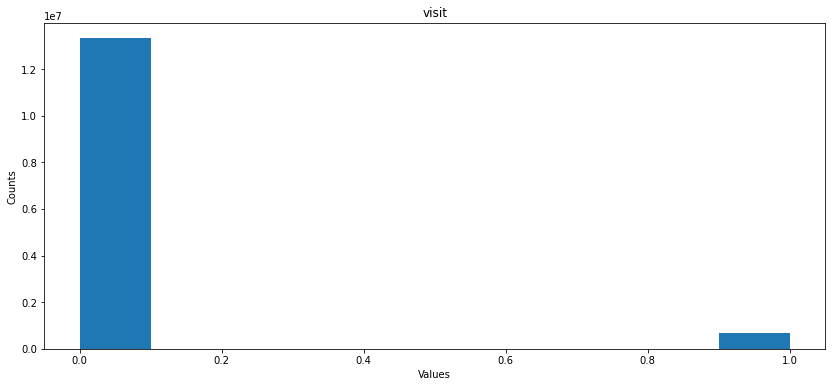

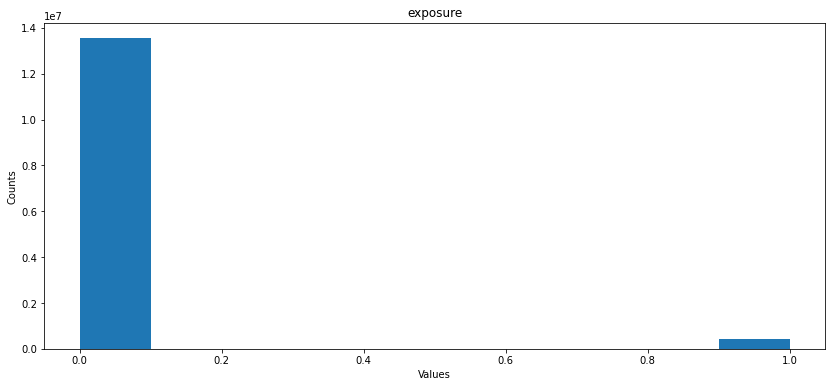

In [9]:
for i, col in enumerate(df.columns):
    # print(i)
    # print(col)
    # plt.figure(figsize=(18, 8))
    plt.figure(i,figsize=(14, 6))
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel("Values")
    plt.ylabel("Counts")

In [10]:
for i in df.columns:
    # print(i)
    a=df[i].isnull().sum()
    print( i, ' Na values : ' ,a )

f0  Na values :  0
f1  Na values :  0
f2  Na values :  0
f3  Na values :  0
f4  Na values :  0
f5  Na values :  0
f6  Na values :  0
f7  Na values :  0
f8  Na values :  0
f9  Na values :  0
f10  Na values :  0
f11  Na values :  0
treatment  Na values :  0
conversion  Na values :  0
visit  Na values :  0
exposure  Na values :  0


## Data Exploration

In [11]:
dfz=df.copy()

conditions = [
    (dfz['treatment'] == 1) & (dfz['conversion'] ==1) & (dfz['exposure'] ==1) & (dfz['visit'] ==0),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==1) & (dfz['exposure'] ==0) & (dfz['visit'] ==0),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==0) & (dfz['exposure'] ==1) & (dfz['visit'] ==0),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==0) & (dfz['exposure'] ==0) & (dfz['visit'] ==0),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==1) & (dfz['exposure'] ==1) & (dfz['visit'] ==0),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==1) & (dfz['exposure'] ==0) & (dfz['visit'] ==0),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==0) & (dfz['exposure'] ==1) & (dfz['visit'] ==0),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==0) & (dfz['exposure'] ==0) & (dfz['visit'] ==0),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==1) & (dfz['exposure'] ==1) & (dfz['visit'] ==1),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==1) & (dfz['exposure'] ==0) & (dfz['visit'] ==1),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==0) & (dfz['exposure'] ==1) & (dfz['visit'] ==1),
    (dfz['treatment'] == 1) & (dfz['conversion'] ==0) & (dfz['exposure'] ==0) & (dfz['visit'] ==1),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==1) & (dfz['exposure'] ==1) & (dfz['visit'] ==1),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==1) & (dfz['exposure'] ==0) & (dfz['visit'] ==1),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==0) & (dfz['exposure'] ==1) & (dfz['visit'] ==1),
    (dfz['treatment'] == 0) & (dfz['conversion'] ==0) & (dfz['exposure'] ==0) & (dfz['visit'] ==1)
    ]

# create a list of the values we want to assign for each condition
values = ['tce', 'tc', 'te', 't', 'ce', 'c', 'e', 'non','tcev', 'tcv', 'tev', 'tv', 'cev', 'cv', 'ev', 'v']

dfz['tier'] = np.select(conditions, values)

# display updated DataFrame
dfz.head()

pd.value_counts(dfz.tier)

NumExpr defaulting to 8 threads.


t       11055129
non      2016832
tv        385634
te        250702
tev       154479
v          76042
tcev       23031
tcv        13680
cv          4063
Name: tier, dtype: int64

In [12]:
dfz.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,tier
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,t
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,t
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,t
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,t
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,t


In [13]:
dfz["tier"].unique()

array(['t', 'te', 'tcev', 'tv', 'tev', 'tcv', 'non', 'v', 'cv'],
      dtype=object)

In [14]:
tabel=pd.crosstab(df['treatment'], df['visit'], margins = True)

In [15]:
tabel

visit,0,1,All
treatment,,,
0,2016832,80105,2096937
1,11305831,576824,11882655
All,13322663,656929,13979592


In [16]:
tabel2=pd.crosstab(df['treatment'],  df['conversion'], margins = True)

In [17]:
tabel2

conversion,0,1,All
treatment,,,
0,2092874,4063,2096937
1,11845944,36711,11882655
All,13938818,40774,13979592


In [18]:
tabel3=pd.crosstab(df['treatment'],  df['exposure'], margins = True)
tabel3

exposure,0,1,All
treatment,,,
0,2096937,0,2096937
1,11454443,428212,11882655
All,13551380,428212,13979592


In [19]:
tabel4=pd.crosstab(df['visit'],  df['conversion'], margins = True)
tabel4

conversion,0,1,All
visit,,,
0,13322663,0,13322663
1,616155,40774,656929
All,13938818,40774,13979592


# Correlation Matrix

In [16]:
cor=df.corr()

In [28]:
cor

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
f0,1.000000,-0.086022,-0.514555,0.280570,-0.093442,0.053413,-0.270590,-0.000088,0.404888,-0.291799,-0.091798,0.078254,-0.002454,-0.037973,-0.134034,-0.123310
f1,-0.086022,1.000000,-0.012844,-0.329413,0.149221,-0.574309,-0.192257,0.151326,-0.143599,0.174166,0.069124,-0.150227,0.008185,0.083103,0.112029,0.188304
f2,-0.514555,-0.012844,1.000000,0.006777,0.024577,-0.022430,0.183739,0.035471,-0.372912,-0.051673,0.088896,0.030912,-0.002233,-0.014175,-0.030331,0.004787
f3,0.280570,-0.329413,0.006777,1.000000,-0.199666,0.334220,0.549706,-0.204964,0.282054,-0.303108,-0.135873,0.171959,-0.016939,-0.104222,-0.207821,-0.371455
f4,-0.093442,0.149221,0.024577,-0.199666,1.000000,-0.197011,-0.159261,0.112939,-0.409904,0.364326,0.658277,-0.677701,0.002829,0.298634,0.267452,0.156960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f11,0.078254,-0.150227,0.030912,0.171959,-0.677701,0.122037,0.089329,-0.050098,0.253150,-0.362990,-0.184619,1.000000,-0.001831,-0.312184,-0.216728,-0.131551
treatment,-0.002454,0.008185,-0.002233,-0.016939,0.002829,-0.010549,-0.014267,0.007487,-0.007940,0.008462,0.003739,-0.001831,1.000000,0.007627,0.017451,0.074675
conversion,-0.037973,0.083103,-0.014175,-0.104222,0.298634,-0.086751,-0.071954,0.043745,-0.130566,0.156245,0.098295,-0.312184,0.007627,1.000000,0.243565,0.167675
visit,-0.134034,0.112029,-0.030331,-0.207821,0.267452,-0.138319,-0.137480,0.091858,-0.457967,0.495268,0.205816,-0.216728,0.017451,0.243565,1.000000,0.308737


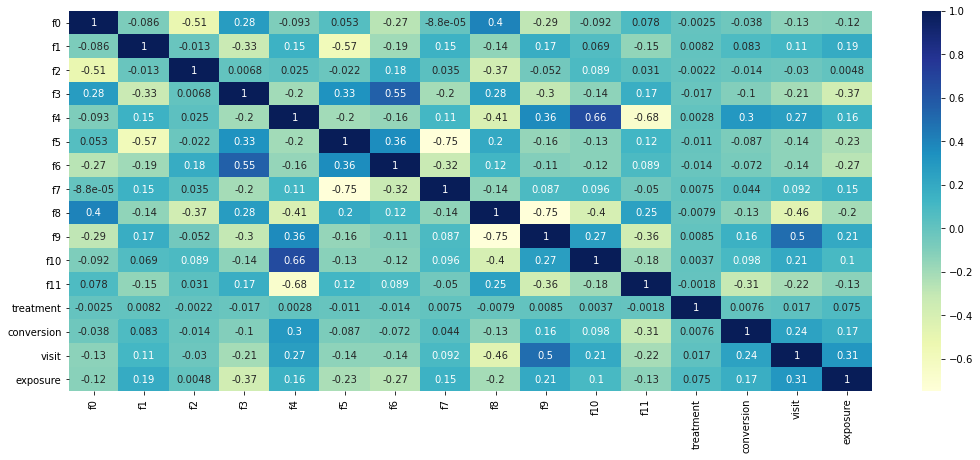

In [34]:
# plotting correlation heatmap
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# Filtering

a) Remoeving features on self-corelation
b) Removing features on correlation with target variable
c) Removing features on Self variance

In [17]:
#  Removing of self correlation

# This  function will find correlation feateures with each other and tell feaure with are highly correlataed nearly same which can be removed

def self_corr(cormatrix,low_range,high_range):

    cor=cormatrix


    fcr_df=pd.DataFrame(columns= ['feature 1', 'feature 2', 'correlation values'])
    l=len(cor)
    fcor_rem=[]
    l
    for j in range(l):
        for k in range(l):
            fcor=cor.iloc[j-1,k-1]

            if fcor>=low_range and fcor <high_range:

                
                f2=cor.index[j-1]
                f3=cor.columns[k-1]

                
                fcor_rem.append([f2, f3, fcor])
                fcr_df=fcr_df.append({'feature 1': f2, 'feature 2' : f3, 'correlation values': fcor}, ignore_index=True)
                


    fcr12=fcr_df.copy()

    for i in range(len(fcr12)):
        for j in range(len(fcr12)):
            try:

                if fcr12.iloc[j,0]==fcr12.iloc[i,1]:
                    fcr12=fcr12.drop(j)
            except:
                    

             fcr12 =fcr12.reset_index(drop=True)

    print(fcr_df.head())
    return(fcr12['feature 1'])
        



In [18]:
rem_selfcor =self_corr(cor,0.8,1)

Empty DataFrame
Columns: [feature 1, feature 2, correlation values]
Index: []


In [19]:
#  Removing of features on correlation with target variable

# if feature has very low correlation with target variable it can be neglected


def target_cor(cor_matrix,target_feature,lower_limit):

    cor= cor_matrix


    cor_target = abs(cor[target_feature])

    #Selecting highly correlated features
    relevant_features = cor_target[cor_target<lower_limit]
    print(relevant_features)
    return(relevant_features.index)

In [57]:
rem_cor=target_cor(cor,'visit',0.1)

f2           0.030331
f7           0.091858
treatment    0.017451
Name: visit, dtype: float64


In [26]:
rem_cor

Index(['f0', 'f1', 'f2', 'f5', 'f6', 'f7', 'treatment'], dtype='object')

In [22]:
## Removing features with low self variance

## Features whcih remain constant can have no effect on predicting targert feature and can be removed

def self_var(dataset,limit):

    var=dataset.var()
    var_rem= var[var<limit]
    print(var_rem)
    return(var_rem.index)

    

In [23]:
rem_var=self_var(df,0.1)

f1            0.010974
f2            0.089590
f8            0.003210
f10           0.028301
f11           0.000521
conversion    0.002908
visit         0.044784
exposure      0.029693
dtype: float64


In [24]:
rem_var

Index(['f1', 'f2', 'f8', 'f10', 'f11', 'conversion', 'visit', 'exposure'], dtype='object')

## Removing features

In [37]:
def remove_features(dataset,rem_feature):

    for i in rem_feature:
        try:
            dataset=dataset.drop(columns= i)
            dataset=dataset.reset_index(drop=True)

            print(dataset.shape)

        except:
            print('Missing')

    return(dataset)

In [38]:
rem_cor

Index(['f0', 'f1', 'f2', 'f5', 'f6', 'f7', 'treatment'], dtype='object')

In [39]:
Xr=df.copy()
Xr=remove_features(Xr,rem_var)

(13979592, 15)
(13979592, 14)
(13979592, 13)
(13979592, 12)
(13979592, 11)
(13979592, 10)
(13979592, 9)
(13979592, 8)


In [40]:
Xr.shape

(13979592, 8)

# Class Approach

# Making X and y datasets

### Creating X and y for treatment=0

In [42]:
df_tr0 =df[(df['treatment']== 0)]
print(df_tr0.shape)
df_tr0.head()

df_tr0_drop=df_tr0.copy()

df_tr0_drop=df_tr0_drop.drop(columns=['treatment','conversion'])

print(df_tr0_drop.shape)

df_tr0_drop.head()

X_df_tr0_drop=df_tr0_drop.drop(columns=['visit'])
y_df_tr0_drop=df_tr0_drop['visit']


(2096937, 16)
(2096937, 14)


### Creating X and y for treatment=1

In [43]:
df_tr1 =df[(df['treatment']== 1)]
print(df_tr1.shape)
df_tr1.head()


df_tr1_drop=df_tr1.copy()

df_tr1_drop=df_tr1_drop.drop(columns=['treatment','conversion'])

print(df_tr1_drop.shape)

df_tr1_drop.head()

X_df_tr1_drop=df_tr1_drop.drop(columns=['visit'])
y_df_tr1_drop=df_tr1_drop['visit']

y_df_tr1_drop.shape

(11882655, 16)
(11882655, 14)


(11882655,)

# Finding best model on treatment 0 dataset

In [59]:
trainX, testX, trainy, testy = train_test_split(X_df_tr0_drop, y_df_tr0_drop, test_size=0.3, random_state=2)

Logistic  :  0.9240255402388866
Decision Tree  :  0.9412635366793343


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.3s finished


Random Forest  :  0.9419635440768807
      Iter       Train Loss   Remaining Time 
         1           0.2766            1.29m
         2           0.2591            1.26m
         3           0.2469            1.32m
         4           0.2378            1.31m
         5           0.2306            1.27m
         6           0.2246            1.22m
         7           0.2196            1.32m
         8           0.2153            1.29m
         9           0.2115            1.25m
        10           0.2083            1.25m
        11           0.2056            1.22m
        12           0.2031            1.17m
        13           0.2010            1.13m
        14           0.1996            1.08m
        15           0.1980            1.05m
        16           0.1966            1.01m
        17           0.1954           58.42s
        18           0.1943           56.15s
        19           0.1934           54.13s
        20           0.1925           52.14s
        21       

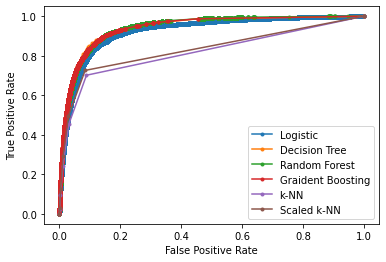

In [44]:
trainX, testX, trainy, testy = train_test_split(X_df_tr0_drop, y_df_tr0_drop, test_size=0.3, random_state=2)

def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

lr = LogisticRegression()
fit_model(lr, "Logistic")

dt = DecisionTreeClassifier(max_depth=5)  
fit_model(dt, "Decision Tree") 

rf = RandomForestClassifier(max_depth=5,n_estimators=50, verbose=2)
fit_model(rf, "Random Forest")

gb = GradientBoostingClassifier(max_depth=2,n_estimators=50, verbose=2)
fit_model(gb, "Graident Boosting")

kn = KNeighborsClassifier(n_neighbors=5)
fit_model(kn, "k-NN")

pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
fit_model(pipe_kn, "Scaled k-NN")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic  :  0.9240255402388866
Decision Tree  :  0.9412635366793343
Random Forest  :  0.9419635440768807
Graident Boosting  :  0.9407031423543095
k-NN  :  0.81705752459023
Scaled k-NN  :  0.8325238834033942


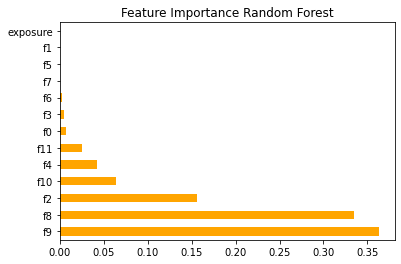

In [45]:
regRF = RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=8,
                      n_estimators=50)#, random_state=0)
regRF.fit(trainX, trainy)
importance_rf = pd.Series(regRF.feature_importances_, index=trainX.columns)
importance_rf_sorted = importance_rf.sort_values()
importance_rf_sorted.nlargest(20).plot(kind='barh', color='orange')
plt.title("Feature Importance Random Forest")
plt.show()

## Hyper Parameter Tuning

### GridSearchCv

In [47]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': [100, 300],
              # 'learning_rate': [0.05,0.1],
            #   'subsample': [1.0, 0.5],
              'max_features': [7]}

# The grid search object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                      param_grid=param_grid, 
                      
                      n_jobs=-1,verbose=3)

# Do the grid search

grid_search.fit(trainX, trainy)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
RandomForestClassifier(max_features=7, n_estimators=300, random_state=42)
0.9621502123847383
{'max_features': 7, 'n_estimators': 300}


In [48]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

RandomForestClassifier(max_features=7, n_estimators=300, random_state=42)
0.9621502123847383
{'max_features': 7, 'n_estimators': 300}


# Tesing the effect of results after applying filtering

(2096937, 11)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 13.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   15.8s finished


Random Forrest  :  0.9414268564278534


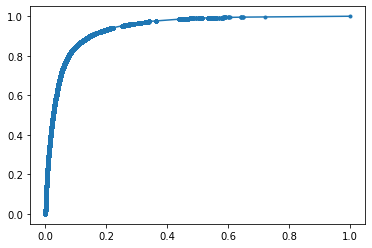

In [58]:
X2=X_df_tr0_drop.copy()
X2=X2.drop(columns=['f2','f7'])
print(X2.shape)


trainX, testX, trainy, testy = train_test_split(X2, y_df_tr0_drop, test_size=0.3, random_state=2)

rf = RandomForestClassifier(max_depth=5,n_estimators=300, verbose=2, max_features=7)

rf.fit(trainX,trainy)
md_probs = rf.predict_proba(testX)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy, md_probs)
print('Random Forrest', " : ", md_auc)
md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
pyplot.plot(md_fpr, md_tpr, marker='.', label='Random Forrest')
#return (md_fpr, md_tpr)

### Using filtering method has decreased the AUC score  from 0.9419635440768807 to 0.9414268564278534
## hence no filtering required

# Findind depth for Best random forrest model features

In [50]:
rf = RandomForestClassifier(max_depth=10,n_estimators=300, verbose=2, max_features=7)

rf.fit(trainX,trainy)
md_probs = rf.predict_proba(testX)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy, md_probs)
print('Random Forrest', " : ", md_auc)
md_fpr, md_tpr, _ = roc_curve(testy, md_probs)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 38.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   23.7s finished


Random Forrest  :  0.9470551686859165


In [63]:
rf = RandomForestClassifier(max_depth=10,n_estimators=800, verbose=2, max_features=7)

rf.fit(trainX,trainy)
md_probs = rf.predict_proba(testX)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy, md_probs)
print('Random Forrest', " : ", md_auc)
md_fpr, md_tpr, _ = roc_curve(testy, md_probs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
building tree 43 of 800


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 49.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   53.0s finished


Random Forrest  :  0.9471275509513373


### Best model and features for treatment 0 datasest
### RandomForestClassifier(max_depth=10,n_estimators=800, verbose=2, max_features=7)

# Training on tr0 and predict on tr1

## For treatment 1 dataset

In [64]:
rf_pred_tr1_vi= RandomForestClassifier(max_depth=10,n_estimators=800, verbose=2, max_features=7)

rf_pred_tr1_vi.fit(X_df_tr0_drop,y_df_tr0_drop)

y_pred_tr1_vi = rf_pred_tr1_vi.predict(X_df_tr1_drop)

md_probs_tr1_vi = rf_pred_tr1_vi.predict_proba(X_df_tr1_drop)
b= md_probs_tr1_vi[:,1]

md_probs_tr1_vi = md_probs_tr1_vi[:,1]
md_auc_tr1_vi = roc_auc_score(y_df_tr1_drop, md_probs_tr1_vi)
print("Random Forrest classifier ", md_auc_tr1_vi)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
building tree 43 of 800


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 101.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 17.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 15.8min finished


Random Forrest classifier  0.9448954418150723


### First Model: RandomForestClassifier(max_depth=10,n_estimators=800, verbose=2, max_features=7)

### with AUC = 0.9448954418150723

# Making the 4 datasets of classess for tr1 dataset

In [65]:
df_tr1_pr=df_tr1.copy()

df_tr1_pr.shape

df_tr1_pr['visit_pred']=y_pred_tr1_vi

df_tr1_pr.shape

df_tr1_pr.head()



# Lost cause
df_lostcause_tr1=df_tr1_pr[(df_tr1_pr['visit']==0) & (df_tr1_pr['visit_pred']==0)]

print("Lost Cause :", df_lostcause_tr1.shape)

# print(df_tr1_pr.shape)


# Sure thing
df_surething_tr1=df_tr1_pr[(df_tr1_pr['visit']==1) & (df_tr1_pr['visit_pred']==1)]

print("Sure thing :",df_surething_tr1.shape)

# print(df_tr1_pr[(df_tr1_pr['visit']==1)].shape)


# Do not disturb customers,

df_dontdisturb_tr1=df_tr1_pr[(df_tr1_pr['visit']==0) & (df_tr1_pr['visit_pred']==1)]

print("Dont Disturb :",df_dontdisturb_tr1.shape)

# print(df_tr1_pr[(df_tr1_pr['visit']==0)].shape)


# persuadable customers,

df_persuadables_tr1=df_tr1_pr[(df_tr1_pr['visit']==1) & (df_tr1_pr['visit_pred']==0)]

print("Persuadables :",df_persuadables_tr1.shape)

# print(df_tr1_pr[(df_tr1_pr['visit']==0)].shape)


Lost Cause : (11236074, 17)
Sure thing : (136281, 17)
Dont Disturb : (69757, 17)
Persuadables : (440543, 17)


In [68]:

df_tr1_target_c = pd.concat([df_persuadables_tr1, df_dontdisturb_tr1, df_lostcause_tr1], axis=0)

In [69]:
df_lostcause_tr1['class']="Lost Cause"

df_lostcause_tr1.head()


df_dontdisturb_tr1['class']="Dont Disturb"

df_dontdisturb_tr1.head()


df_persuadables_tr1['class']="Persuadables"

df_persuadables_tr1.head()



df_surething_tr1['class']="Sure Thing"

df_surething_tr1.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class
715,12.781566,10.059654,8.215920,1.114982,11.561050,4.115453,-7.011752,4.833815,3.799079,45.054671,5.303177,-0.337358,1,1,1,1,1,Sure Thing
719,20.729166,10.059654,8.233548,4.679882,12.310110,3.013064,-12.641800,10.076439,3.760462,45.859490,5.988106,-0.168679,1,0,1,0,1,Sure Thing
810,19.858687,10.059654,8.214812,-0.824913,14.534338,4.115453,-12.347072,4.833815,3.732937,42.097918,5.984653,-0.168679,1,0,1,0,1,Sure Thing
938,19.130876,10.059654,8.260640,-2.118394,14.234099,4.115453,-13.693086,4.833815,3.762166,38.403249,5.897571,-0.337358,1,0,1,0,1,Sure Thing
1330,13.986868,10.059654,8.229972,-0.877095,12.594889,4.115453,-17.852702,4.833815,3.790775,37.585601,6.195253,-0.168679,1,1,1,1,1,Sure Thing


# Training on target(tr1 without sure thing dataframe) and predict on tr0

In [70]:
df_tr0_drop.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,visit,exposure
5571799,12.974809,10.059654,8.761255,2.293959,10.280525,4.115453,-5.116672,4.833815,3.955396,13.190056,5.300375,-0.168679,0,0
5571800,16.177822,10.059654,8.214383,3.359763,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0
5571801,12.616365,10.059654,8.497501,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,16.226044,5.300375,-0.168679,0,0
5571802,26.683908,10.059654,8.214383,4.679882,10.280525,4.115453,-11.681070,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0
5571803,24.359765,10.059654,8.214383,4.679882,10.280525,4.115453,-11.944313,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0


In [74]:

df_tr1_target_drop=df_tr1_target_c.copy()

df_tr1_target_drop=df_tr1_target_drop.drop(columns=['treatment', 'conversion','visit_pred'])

print(df_tr1_target_drop.shape)

df_tr1_target_drop.head()

X_df_tr1_target_drop=df_tr1_target_drop
X_df_tr1_target_drop=df_tr1_target_drop.drop(columns=['visit'])
y_df_tr1_target1_drop=df_tr1_target_drop['visit']

print(X_df_tr1_target_drop.shape)


rf_pred_tr0_vi=RandomForestClassifier(max_depth=10,n_estimators=800, verbose=10, max_features=7, n_jobs=-1)

rf_pred_tr0_vi.fit(X_df_tr1_target_drop,y_df_tr1_target1_drop)

y_pred_tr0_vi = rf_pred_tr0_vi.predict(X_df_tr0_drop)

md_probs_tr0_vi = rf_pred_tr0_vi.predict_proba(X_df_tr0_drop)
b= md_probs_tr0_vi[:,1]

md_probs_tr0_vi = md_probs_tr0_vi[:,1]
md_auc_tr0_vi = roc_auc_score(y_df_tr0_drop, md_probs_tr0_vi)
print("Random Forrest", md_auc_tr0_vi)

(11746374, 14)
(11746374, 13)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 2 of 800building tree 1 of 800building tree 3 of 800building tree 4 of 800


building tree 5 of 800
building tree 6 of 800building tree 7 of 800building tree 8 of 800



building tree 9 of 800
building tree 10 of 800


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min


building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.6min


building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.0min


building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min


building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.1min


building tree 43 of 800
building tree 44 of 800
building tree 45 of 800
building tree 46 of 800
building tree 47 of 800
building tree 48 of 800
building tree 49 of 800
building tree 50 of 800
building tree 51 of 800
building tree 52 of 800
building tree 53 of 800


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  7.4min


building tree 54 of 800
building tree 55 of 800
building tree 56 of 800
building tree 57 of 800
building tree 58 of 800
building tree 59 of 800
building tree 60 of 800
building tree 61 of 800
building tree 62 of 800
building tree 63 of 800
building tree 64 of 800


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  9.1min


building tree 65 of 800
building tree 66 of 800
building tree 67 of 800
building tree 68 of 800
building tree 69 of 800
building tree 70 of 800
building tree 71 of 800
building tree 72 of 800
building tree 73 of 800
building tree 74 of 800
building tree 75 of 800
building tree 76 of 800


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 11.0min


building tree 77 of 800
building tree 78 of 800
building tree 79 of 800
building tree 80 of 800
building tree 81 of 800
building tree 82 of 800
building tree 83 of 800
building tree 84 of 800
building tree 85 of 800
building tree 86 of 800
building tree 87 of 800
building tree 88 of 800
building tree 89 of 800


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 12.9min


building tree 90 of 800
building tree 91 of 800
building tree 92 of 800
building tree 93 of 800
building tree 94 of 800
building tree 95 of 800
building tree 96 of 800
building tree 97 of 800
building tree 98 of 800
building tree 99 of 800
building tree 100 of 800
building tree 101 of 800
building tree 102 of 800
building tree 103 of 800
building tree 104 of 800
building tree 105 of 800


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 15.1min


building tree 106 of 800
building tree 107 of 800
building tree 108 of 800
building tree 109 of 800
building tree 110 of 800
building tree 111 of 800
building tree 112 of 800
building tree 113 of 800
building tree 114 of 800
building tree 115 of 800
building tree 116 of 800
building tree 117 of 800
building tree 118 of 800
building tree 119 of 800
building tree 120 of 800


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 17.5min


building tree 121 of 800
building tree 122 of 800
building tree 123 of 800
building tree 124 of 800
building tree 125 of 800
building tree 126 of 800
building tree 127 of 800
building tree 128 of 800
building tree 129 of 800
building tree 130 of 800
building tree 131 of 800
building tree 132 of 800
building tree 133 of 800
building tree 134 of 800
building tree 135 of 800
building tree 136 of 800
building tree 137 of 800


[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 33.5min


building tree 138 of 800
building tree 139 of 800
building tree 140 of 800
building tree 141 of 800
building tree 142 of 800
building tree 143 of 800
building tree 144 of 800
building tree 145 of 800
building tree 146 of 800
building tree 147 of 800
building tree 148 of 800
building tree 149 of 800
building tree 150 of 800
building tree 151 of 800
building tree 152 of 800
building tree 153 of 800
building tree 154 of 800


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 35.8min


building tree 155 of 800
building tree 156 of 800
building tree 157 of 800
building tree 158 of 800
building tree 159 of 800
building tree 160 of 800
building tree 161 of 800
building tree 162 of 800
building tree 163 of 800
building tree 164 of 800
building tree 165 of 800
building tree 166 of 800
building tree 167 of 800
building tree 168 of 800
building tree 169 of 800
building tree 170 of 800
building tree 171 of 800
building tree 172 of 800
building tree 173 of 800


[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 38.7min


building tree 174 of 800
building tree 175 of 800
building tree 176 of 800
building tree 177 of 800
building tree 178 of 800
building tree 179 of 800
building tree 180 of 800
building tree 181 of 800
building tree 182 of 800
building tree 183 of 800
building tree 184 of 800
building tree 185 of 800
building tree 186 of 800
building tree 187 of 800
building tree 188 of 800
building tree 189 of 800
building tree 190 of 800
building tree 191 of 800


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 41.2min


building tree 192 of 800
building tree 193 of 800
building tree 194 of 800
building tree 195 of 800
building tree 196 of 800
building tree 197 of 800
building tree 198 of 800
building tree 199 of 800
building tree 200 of 800
building tree 201 of 800
building tree 202 of 800
building tree 203 of 800
building tree 204 of 800
building tree 205 of 800
building tree 206 of 800
building tree 207 of 800
building tree 208 of 800
building tree 209 of 800
building tree 210 of 800
building tree 211 of 800
building tree 212 of 800
building tree 213 of 800


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed: 43.8min


building tree 214 of 800
building tree 215 of 800
building tree 216 of 800
building tree 217 of 800
building tree 218 of 800
building tree 219 of 800
building tree 220 of 800
building tree 221 of 800
building tree 222 of 800
building tree 223 of 800
building tree 224 of 800
building tree 225 of 800
building tree 226 of 800
building tree 227 of 800
building tree 228 of 800
building tree 229 of 800
building tree 230 of 800
building tree 231 of 800
building tree 232 of 800
building tree 233 of 800
building tree 234 of 800


[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed: 46.6min


building tree 235 of 800
building tree 236 of 800
building tree 237 of 800
building tree 238 of 800
building tree 239 of 800
building tree 240 of 800
building tree 241 of 800
building tree 242 of 800
building tree 243 of 800
building tree 244 of 800
building tree 245 of 800
building tree 246 of 800
building tree 247 of 800
building tree 248 of 800
building tree 249 of 800
building tree 250 of 800
building tree 251 of 800
building tree 252 of 800
building tree 253 of 800
building tree 254 of 800
building tree 255 of 800
building tree 256 of 800
building tree 257 of 800


[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed: 49.6min


building tree 258 of 800
building tree 259 of 800
building tree 260 of 800
building tree 261 of 800
building tree 262 of 800
building tree 263 of 800
building tree 264 of 800
building tree 265 of 800
building tree 266 of 800
building tree 267 of 800
building tree 268 of 800
building tree 269 of 800
building tree 270 of 800
building tree 271 of 800
building tree 272 of 800
building tree 273 of 800
building tree 274 of 800
building tree 275 of 800
building tree 276 of 800
building tree 277 of 800
building tree 278 of 800
building tree 279 of 800


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 52.6min


building tree 280 of 800
building tree 281 of 800
building tree 282 of 800
building tree 283 of 800
building tree 284 of 800
building tree 285 of 800
building tree 286 of 800
building tree 287 of 800
building tree 288 of 800
building tree 289 of 800
building tree 290 of 800
building tree 291 of 800
building tree 292 of 800
building tree 293 of 800
building tree 294 of 800
building tree 295 of 800
building tree 296 of 800
building tree 297 of 800
building tree 298 of 800
building tree 299 of 800
building tree 300 of 800
building tree 301 of 800
building tree 302 of 800
building tree 303 of 800
building tree 304 of 800
building tree 305 of 800


[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed: 55.9min


building tree 306 of 800
building tree 307 of 800
building tree 308 of 800
building tree 309 of 800
building tree 310 of 800
building tree 311 of 800
building tree 312 of 800
building tree 313 of 800
building tree 314 of 800
building tree 315 of 800
building tree 316 of 800
building tree 317 of 800
building tree 318 of 800
building tree 319 of 800
building tree 320 of 800
building tree 321 of 800
building tree 322 of 800
building tree 323 of 800
building tree 324 of 800
building tree 325 of 800
building tree 326 of 800
building tree 327 of 800
building tree 328 of 800
building tree 329 of 800
building tree 330 of 800


[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed: 59.2min


building tree 331 of 800
building tree 332 of 800
building tree 333 of 800
building tree 334 of 800
building tree 335 of 800
building tree 336 of 800
building tree 337 of 800
building tree 338 of 800
building tree 339 of 800
building tree 340 of 800
building tree 341 of 800
building tree 342 of 800
building tree 343 of 800
building tree 344 of 800
building tree 345 of 800
building tree 346 of 800
building tree 347 of 800
building tree 348 of 800
building tree 349 of 800
building tree 350 of 800
building tree 351 of 800
building tree 352 of 800
building tree 353 of 800
building tree 354 of 800
building tree 355 of 800
building tree 356 of 800
building tree 357 of 800


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 62.7min


building tree 358 of 800
building tree 359 of 800
building tree 360 of 800
building tree 361 of 800
building tree 362 of 800
building tree 363 of 800building tree 364 of 800

building tree 365 of 800
building tree 366 of 800
building tree 367 of 800
building tree 368 of 800
building tree 369 of 800
building tree 370 of 800
building tree 371 of 800
building tree 372 of 800
building tree 373 of 800
building tree 374 of 800
building tree 375 of 800
building tree 376 of 800
building tree 377 of 800
building tree 378 of 800
building tree 379 of 800
building tree 380 of 800
building tree 381 of 800
building tree 382 of 800
building tree 383 of 800
building tree 384 of 800


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed: 66.1min


building tree 385 of 800
building tree 386 of 800
building tree 387 of 800
building tree 388 of 800
building tree 389 of 800
building tree 390 of 800
building tree 391 of 800
building tree 392 of 800
building tree 393 of 800
building tree 394 of 800
building tree 395 of 800
building tree 396 of 800
building tree 397 of 800
building tree 398 of 800
building tree 399 of 800
building tree 400 of 800
building tree 401 of 800
building tree 402 of 800
building tree 403 of 800
building tree 404 of 800
building tree 405 of 800
building tree 406 of 800
building tree 407 of 800
building tree 408 of 800
building tree 409 of 800
building tree 410 of 800
building tree 411 of 800
building tree 412 of 800
building tree 413 of 800


[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 70.1min


building tree 414 of 800
building tree 415 of 800
building tree 416 of 800
building tree 417 of 800
building tree 418 of 800
building tree 419 of 800
building tree 420 of 800
building tree 421 of 800
building tree 422 of 800
building tree 423 of 800
building tree 424 of 800
building tree 425 of 800
building tree 426 of 800
building tree 427 of 800
building tree 428 of 800
building tree 429 of 800
building tree 430 of 800
building tree 431 of 800
building tree 432 of 800
building tree 433 of 800
building tree 434 of 800
building tree 435 of 800
building tree 436 of 800
building tree 437 of 800
building tree 438 of 800
building tree 439 of 800
building tree 440 of 800
building tree 441 of 800
building tree 442 of 800


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 74.0min


building tree 443 of 800
building tree 444 of 800
building tree 445 of 800
building tree 446 of 800
building tree 447 of 800
building tree 448 of 800
building tree 449 of 800
building tree 450 of 800
building tree 451 of 800
building tree 452 of 800
building tree 453 of 800
building tree 454 of 800
building tree 455 of 800
building tree 456 of 800
building tree 457 of 800
building tree 458 of 800
building tree 459 of 800
building tree 460 of 800
building tree 461 of 800
building tree 462 of 800
building tree 463 of 800
building tree 464 of 800
building tree 465 of 800
building tree 466 of 800
building tree 467 of 800
building tree 468 of 800
building tree 469 of 800
building tree 470 of 800
building tree 471 of 800
building tree 472 of 800


[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed: 78.0min


building tree 473 of 800
building tree 474 of 800
building tree 475 of 800
building tree 476 of 800
building tree 477 of 800
building tree 478 of 800
building tree 479 of 800
building tree 480 of 800
building tree 481 of 800
building tree 482 of 800
building tree 483 of 800
building tree 484 of 800
building tree 485 of 800
building tree 486 of 800
building tree 487 of 800
building tree 488 of 800
building tree 489 of 800
building tree 490 of 800
building tree 491 of 800
building tree 492 of 800
building tree 493 of 800
building tree 494 of 800
building tree 495 of 800
building tree 496 of 800
building tree 497 of 800
building tree 498 of 800
building tree 499 of 800
building tree 500 of 800
building tree 501 of 800
building tree 502 of 800
building tree 503 of 800
building tree 504 of 800
building tree 505 of 800


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 82.1min


building tree 506 of 800
building tree 507 of 800
building tree 508 of 800
building tree 509 of 800
building tree 510 of 800
building tree 511 of 800
building tree 512 of 800
building tree 513 of 800
building tree 514 of 800
building tree 515 of 800
building tree 516 of 800
building tree 517 of 800
building tree 518 of 800
building tree 519 of 800
building tree 520 of 800
building tree 521 of 800
building tree 522 of 800
building tree 523 of 800
building tree 524 of 800
building tree 525 of 800
building tree 526 of 800
building tree 527 of 800
building tree 528 of 800
building tree 529 of 800
building tree 530 of 800
building tree 531 of 800
building tree 532 of 800
building tree 533 of 800
building tree 534 of 800
building tree 535 of 800
building tree 536 of 800
building tree 537 of 800


[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed: 86.3min


building tree 538 of 800
building tree 539 of 800
building tree 540 of 800
building tree 541 of 800
building tree 542 of 800
building tree 543 of 800
building tree 544 of 800
building tree 545 of 800
building tree 546 of 800
building tree 547 of 800
building tree 548 of 800
building tree 549 of 800
building tree 550 of 800
building tree 551 of 800
building tree 552 of 800
building tree 553 of 800
building tree 554 of 800
building tree 555 of 800
building tree 556 of 800
building tree 557 of 800
building tree 558 of 800
building tree 559 of 800
building tree 560 of 800
building tree 561 of 800
building tree 562 of 800
building tree 563 of 800
building tree 564 of 800
building tree 565 of 800
building tree 566 of 800
building tree 567 of 800
building tree 568 of 800
building tree 569 of 800


[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed: 90.8min


building tree 570 of 800
building tree 571 of 800
building tree 572 of 800
building tree 573 of 800
building tree 574 of 800
building tree 575 of 800
building tree 576 of 800
building tree 577 of 800
building tree 578 of 800
building tree 579 of 800
building tree 580 of 800
building tree 581 of 800
building tree 582 of 800
building tree 583 of 800
building tree 584 of 800
building tree 585 of 800
building tree 586 of 800
building tree 587 of 800
building tree 588 of 800
building tree 589 of 800
building tree 590 of 800
building tree 591 of 800
building tree 592 of 800
building tree 593 of 800
building tree 594 of 800
building tree 595 of 800
building tree 596 of 800
building tree 597 of 800
building tree 598 of 800
building tree 599 of 800
building tree 600 of 800
building tree 601 of 800
building tree 602 of 800
building tree 603 of 800
building tree 604 of 800
building tree 605 of 800


[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed: 96.0min


building tree 606 of 800
building tree 607 of 800
building tree 608 of 800
building tree 609 of 800
building tree 610 of 800
building tree 611 of 800
building tree 612 of 800
building tree 613 of 800
building tree 614 of 800
building tree 615 of 800
building tree 616 of 800
building tree 617 of 800
building tree 618 of 800
building tree 619 of 800
building tree 620 of 800
building tree 621 of 800
building tree 622 of 800
building tree 623 of 800
building tree 624 of 800
building tree 625 of 800
building tree 626 of 800
building tree 627 of 800
building tree 628 of 800
building tree 629 of 800
building tree 630 of 800
building tree 631 of 800
building tree 632 of 800
building tree 633 of 800
building tree 634 of 800
building tree 635 of 800
building tree 636 of 800
building tree 637 of 800
building tree 638 of 800
building tree 639 of 800
building tree 640 of 800


[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 104.8min


building tree 641 of 800
building tree 642 of 800
building tree 643 of 800
building tree 644 of 800
building tree 645 of 800
building tree 646 of 800
building tree 647 of 800
building tree 648 of 800
building tree 649 of 800
building tree 650 of 800
building tree 651 of 800
building tree 652 of 800
building tree 653 of 800
building tree 654 of 800
building tree 655 of 800
building tree 656 of 800
building tree 657 of 800
building tree 658 of 800
building tree 659 of 800
building tree 660 of 800
building tree 661 of 800
building tree 662 of 800
building tree 663 of 800
building tree 664 of 800
building tree 665 of 800
building tree 666 of 800
building tree 667 of 800
building tree 668 of 800
building tree 669 of 800
building tree 670 of 800
building tree 671 of 800
building tree 672 of 800
building tree 673 of 800
building tree 674 of 800
building tree 675 of 800
building tree 676 of 800
building tree 677 of 800


[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed: 116.8min


building tree 678 of 800
building tree 679 of 800
building tree 680 of 800
building tree 681 of 800
building tree 682 of 800
building tree 683 of 800
building tree 684 of 800
building tree 685 of 800
building tree 686 of 800
building tree 687 of 800
building tree 688 of 800
building tree 689 of 800
building tree 690 of 800
building tree 691 of 800
building tree 692 of 800
building tree 693 of 800
building tree 694 of 800
building tree 695 of 800
building tree 696 of 800
building tree 697 of 800
building tree 698 of 800
building tree 699 of 800
building tree 700 of 800
building tree 701 of 800
building tree 702 of 800
building tree 703 of 800
building tree 704 of 800
building tree 705 of 800
building tree 706 of 800
building tree 707 of 800
building tree 708 of 800
building tree 709 of 800
building tree 710 of 800
building tree 711 of 800
building tree 712 of 800
building tree 713 of 800
building tree 714 of 800


[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed: 125.5min


building tree 715 of 800
building tree 716 of 800
building tree 717 of 800
building tree 718 of 800
building tree 719 of 800
building tree 720 of 800
building tree 721 of 800
building tree 722 of 800
building tree 723 of 800
building tree 724 of 800
building tree 725 of 800
building tree 726 of 800
building tree 727 of 800
building tree 728 of 800
building tree 729 of 800
building tree 730 of 800
building tree 731 of 800
building tree 732 of 800
building tree 733 of 800
building tree 734 of 800
building tree 735 of 800
building tree 736 of 800
building tree 737 of 800
building tree 738 of 800
building tree 739 of 800
building tree 740 of 800
building tree 741 of 800
building tree 742 of 800
building tree 743 of 800
building tree 744 of 800
building tree 745 of 800
building tree 746 of 800
building tree 747 of 800
building tree 748 of 800building tree 749 of 800

building tree 750 of 800
building tree 751 of 800
building tree 752 of 800
building tree 753 of 800


[Parallel(n_jobs=-1)]: Done 745 tasks      | elapsed: 136.2min


building tree 754 of 800
building tree 755 of 800
building tree 756 of 800
building tree 757 of 800
building tree 758 of 800
building tree 759 of 800
building tree 760 of 800
building tree 761 of 800
building tree 762 of 800
building tree 763 of 800
building tree 764 of 800
building tree 765 of 800
building tree 766 of 800
building tree 767 of 800
building tree 768 of 800
building tree 769 of 800
building tree 770 of 800
building tree 771 of 800
building tree 772 of 800
building tree 773 of 800
building tree 774 of 800
building tree 775 of 800
building tree 776 of 800
building tree 777 of 800
building tree 778 of 800
building tree 779 of 800
building tree 780 of 800
building tree 781 of 800
building tree 782 of 800
building tree 783 of 800
building tree 784 of 800
building tree 785 of 800
building tree 786 of 800
building tree 787 of 800
building tree 788 of 800
building tree 789 of 800
building tree 790 of 800
building tree 791 of 800building tree 792 of 800



[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 143.8min


building tree 793 of 800
building tree 794 of 800
building tree 795 of 800
building tree 796 of 800
building tree 797 of 800
building tree 798 of 800
building tree 799 of 800
building tree 800 of 800


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 146.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   

Random Forrest 0.9276242580523582


## Winner best model for treatment 0 dataset

In [75]:

gb_pred_tr0_vi = GradientBoostingClassifier(max_depth=2,n_estimators=200,verbose=2)

gb_pred_tr0_vi.fit(X_df_tr1_target_drop,y_df_tr1_target1_drop)

y_pred_tr0_vi2 = gb_pred_tr0_vi.predict(X_df_tr0_drop)

md_probs_tr0_vi2 = gb_pred_tr0_vi.predict_proba(X_df_tr0_drop)
b= md_probs_tr0_vi2[:,1]

md_probs_tr0_vi2 = md_probs_tr0_vi2[:,1]
md_auc_tr0_vi = roc_auc_score(y_df_tr0_drop, md_probs_tr0_vi2)
print("Gradient Boosting", md_auc_tr0_vi)

      Iter       Train Loss   Remaining Time 
         1           0.2826           42.24m
         2           0.2660           41.06m
         3           0.2539           40.40m
         4           0.2446           40.27m
         5           0.2376           39.98m
         6           0.2312           39.69m
         7           0.2262           39.68m
         8           0.2221           39.80m
         9           0.2188           39.61m
        10           0.2154           39.37m
        11           0.2126           39.24m
        12           0.2101           39.23m
        13           0.2080           38.98m
        14           0.2061           38.80m
        15           0.2047           38.61m
        16           0.2031           38.40m
        17           0.2018           39.05m
        18           0.2007           40.17m
        19           0.1996           40.96m
        20           0.1987           41.74m
        21           0.1983           42.69m
        2

Best Model-2 GradientBoostingClassifier(max_depth=2,n_estimators=200,verbose=2)

 AUC 0.9327316640956339

# Making datasets of 4 classess for treatment 0

In [76]:
df_tr0_pr=df_tr0.copy()

df_tr0_pr.shape

df_tr0_pr['visit_pred']=y_pred_tr0_vi2

df_tr0_pr.shape

df_tr0_pr.head()



# Lost cause
df_lostcause_tr0=df_tr0_pr[(df_tr0_pr['visit']==0) & (df_tr0_pr['visit_pred']==0)]

print("Lost Cause :",df_lostcause_tr0.shape)

# print(df_tr0_pr.shape)


# Sure thing
df_surething_tr0=df_tr0_pr[(df_tr0_pr['visit']==1) & (df_tr0_pr['visit_pred']==1)]

print("Sure Thing :",df_surething_tr0.shape)

# Do not disturb customers,

df_dontdisturb_tr0=df_tr0_pr[(df_tr0_pr['visit']==1) & (df_tr0_pr['visit_pred']==0)]

print("Dont Disturb :",df_dontdisturb_tr0.shape)


# persuadable customers,

df_persuadables_tr0=df_tr0_pr[(df_tr0_pr['visit']==0) & (df_tr0_pr['visit_pred']==1)]

print("Persuadables :",df_persuadables_tr0.shape)


Lost Cause : (2016832, 17)
Sure Thing : (0, 17)
Dont Disturb : (80105, 17)
Persuadables : (0, 17)


In [77]:
df_lostcause_tr0.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred
5571799,12.974809,10.059654,8.761255,2.293959,10.280525,4.115453,-5.116672,4.833815,3.955396,13.190056,5.300375,-0.168679,0,0,0,0,0
5571800,16.177822,10.059654,8.214383,3.359763,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0,0
5571801,12.616365,10.059654,8.497501,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,16.226044,5.300375,-0.168679,0,0,0,0,0
5571802,26.683908,10.059654,8.214383,4.679882,10.280525,4.115453,-11.681070,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0,0
5571803,24.359765,10.059654,8.214383,4.679882,10.280525,4.115453,-11.944313,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0,0


In [78]:
df_lostcause_tr0['class']="Lost Cause"

df_lostcause_tr0.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class
5571799,12.974809,10.059654,8.761255,2.293959,10.280525,4.115453,-5.116672,4.833815,3.955396,13.190056,5.300375,-0.168679,0,0,0,0,0,Lost Cause
5571800,16.177822,10.059654,8.214383,3.359763,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0,0,Lost Cause
5571801,12.616365,10.059654,8.497501,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,16.226044,5.300375,-0.168679,0,0,0,0,0,Lost Cause
5571802,26.683908,10.059654,8.214383,4.679882,10.280525,4.115453,-11.681070,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0,0,Lost Cause
5571803,24.359765,10.059654,8.214383,4.679882,10.280525,4.115453,-11.944313,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0,0,Lost Cause


In [79]:
df_surething_tr0['class']="Sure Thing"

df_surething_tr0.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class


In [80]:
df_dontdisturb_tr0['class']="Dont Disturb"

df_dontdisturb_tr0.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class
5571827,14.902849,11.460441,8.559909,-0.824913,14.439578,-1.175138,-20.029034,7.789613,3.760240,30.431049,6.158764,-0.168679,0,0,1,0,0,Dont Disturb
5571891,24.590647,10.059654,8.876181,4.679882,10.280525,4.115453,-7.570316,4.833815,3.892853,13.190056,5.300375,-0.168679,0,0,1,0,0,Dont Disturb
5571896,12.616365,10.059654,8.589735,4.679882,10.280525,4.115453,0.294443,4.833815,3.835851,25.954644,5.300375,-0.168679,0,0,1,0,0,Dont Disturb
5571914,23.508796,10.059654,8.214383,4.679882,10.280525,3.013064,-7.301017,10.357215,3.971858,13.190056,5.300375,-0.168679,0,0,1,0,0,Dont Disturb
5571917,16.455590,10.059654,8.317446,2.587543,11.561050,4.115453,-3.993764,4.833815,3.867720,32.395545,5.597216,-0.337358,0,0,1,0,0,Dont Disturb


In [81]:
df_persuadables_tr0['class']="Persuadables"

df_persuadables_tr0.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class


# Combining datasets

In [82]:
df_persuadables = pd.concat([df_persuadables_tr1, df_persuadables_tr0], axis=0)

df_persuadables.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class
738,24.528223,10.059654,8.403907,4.679882,11.561050,4.115453,-3.993764,4.833815,3.844556,26.606156,6.064094,-0.168679,1,0,1,0,0,Persuadables
743,12.616365,10.059654,8.301676,4.679882,11.029584,4.115453,0.294443,4.833815,3.829288,23.570168,6.318202,-0.168679,1,0,1,0,0,Persuadables
808,13.018571,10.059654,8.301697,-0.413110,10.280525,4.115453,-10.143546,4.833815,3.876391,30.796373,5.300375,-0.168679,1,0,1,1,0,Persuadables
873,21.417263,10.059654,8.815803,4.679882,10.280525,4.115453,-7.301017,4.833815,3.934656,13.190056,5.300375,-0.168679,1,0,1,0,0,Persuadables
999,16.042560,10.059654,8.424067,1.815324,11.561050,4.115453,-7.301017,4.833815,3.870970,28.760224,5.687790,-0.267350,1,0,1,1,0,Persuadables


In [83]:
df_surething = pd.concat([df_surething_tr1, df_surething_tr0], axis=0)

df_surething.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class
715,12.781566,10.059654,8.215920,1.114982,11.561050,4.115453,-7.011752,4.833815,3.799079,45.054671,5.303177,-0.337358,1,1,1,1,1,Sure Thing
719,20.729166,10.059654,8.233548,4.679882,12.310110,3.013064,-12.641800,10.076439,3.760462,45.859490,5.988106,-0.168679,1,0,1,0,1,Sure Thing
810,19.858687,10.059654,8.214812,-0.824913,14.534338,4.115453,-12.347072,4.833815,3.732937,42.097918,5.984653,-0.168679,1,0,1,0,1,Sure Thing
938,19.130876,10.059654,8.260640,-2.118394,14.234099,4.115453,-13.693086,4.833815,3.762166,38.403249,5.897571,-0.337358,1,0,1,0,1,Sure Thing
1330,13.986868,10.059654,8.229972,-0.877095,12.594889,4.115453,-17.852702,4.833815,3.790775,37.585601,6.195253,-0.168679,1,1,1,1,1,Sure Thing


In [84]:
df_dontdisturb = pd.concat([df_dontdisturb_tr1, df_dontdisturb_tr0], axis=0)

df_dontdisturb.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class
494,14.261739,10.059654,8.215801,-2.248004,13.738506,4.115453,-17.312769,4.833815,3.759800,31.796212,6.343323,-0.168679,1,0,0,0,1,Dont Disturb
1508,18.441588,10.059654,8.242693,1.614662,14.792535,4.115453,-7.011752,4.833815,3.756240,48.879564,5.424499,-0.560340,1,0,0,0,1,Dont Disturb
2559,12.779605,11.460441,8.224734,-4.228532,15.720104,-0.260328,-23.994102,4.959979,3.685815,50.708029,5.677373,-0.436029,1,0,0,0,1,Dont Disturb
2644,13.534997,10.059654,8.250293,-2.036172,14.122101,3.013064,-19.717495,11.186675,3.757772,45.107587,5.459782,-0.534700,1,0,0,0,1,Dont Disturb
4140,14.069380,10.059654,8.268557,-1.332715,15.990940,3.013064,-18.105782,11.854185,3.696938,48.282885,5.380072,-0.583534,1,0,0,1,1,Dont Disturb


In [85]:
df_lostcause = pd.concat([df_lostcause_tr1, df_lostcause_tr0], axis=0)

df_lostcause.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause


In [86]:
df_class_total=pd.concat([df_lostcause, df_dontdisturb, df_surething, df_persuadables], axis=0)

print(df.shape)

print(df_class_total.shape)

df_class_total.head()

(13979592, 16)
(13979592, 18)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,visit_pred,class
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0,Lost Cause


In [89]:
df_class_total=df_class_total.drop(columns=['visit_pred'])

print(df_class_total.shape)

df_class_total.head()

(13979592, 17)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause


In [90]:
df_class_total.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,class
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,Lost Cause


# Exporting dataset

In [91]:
df_class_total.to_csv("df_classes.csv",index=False)